In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load the dataset
df = pd.read_csv("sonar.csv")

In [5]:
# Step 2: Check for label column (assume 'Label' if exists)
if 'Label' in df.columns or 'Class' in df.columns:
    df_features = df.drop(columns=['Label', 'Class'], errors='ignore')
else:
    df_features = df.copy()

In [6]:
# Step 3: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

In [7]:
# Step 5: Apply Agglomerative Clustering (choose k=2 for sonar: Rock vs Mine)
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = cluster.fit_predict(X_scaled)

In [8]:
# Step 6: Attach cluster labels to original DataFrame
df['Cluster'] = labels

In [9]:
# Step 7: Show number of data points in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
summary_table = pd.DataFrame({
    'Cluster Label': cluster_counts.index,
    'Number of Data Points': cluster_counts.values
})

print("\nCluster Distribution:")
print(summary_table.to_string(index=False))


Cluster Distribution:
 Cluster Label  Number of Data Points
             0                    169
             1                     39


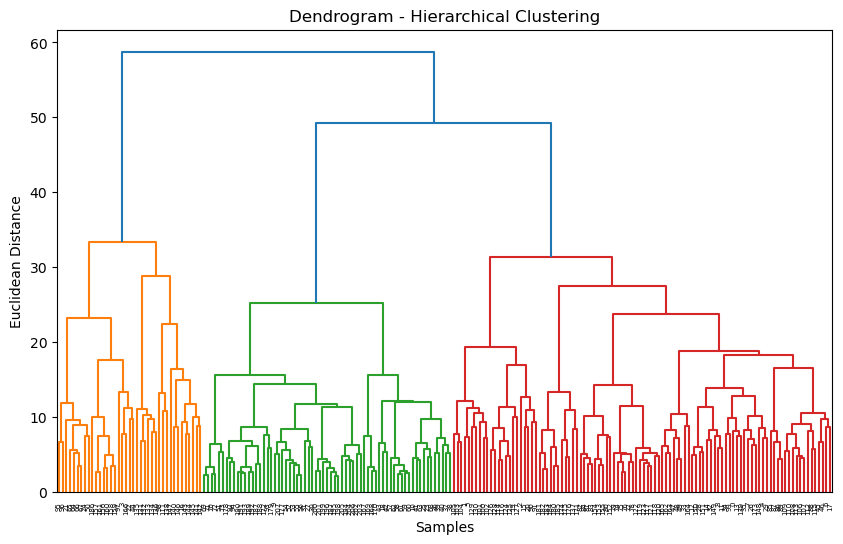

In [10]:
# Step 4: Plot dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()